In [9]:
from train import train_policy
from utils import rollout_policy
from vis import plot_training_rewards, plot_rollout_histogram
import gymnasium as gym
import torch
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Currently using device: {device}")

Currently using device: cuda:0


### Part 1: Train basic policy gradient agent on CartPole environment

#### Training

In [2]:
env = gym.make("CartPole-v1")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
obs_dim = env.observation_space.shape[0]
act_dim = env.action_space.n

trained_policy, training_rewards = train_policy(
    env=env,
    device=device,
    obs_dim=obs_dim,
    act_dim=act_dim,
    preprocess_obs=None,
    action_map=None,
    policy_lr=2e-3, # Adjust the learning rate for more efficient training
    gamma=0.95,
    training_episodes=750,
    hidden_dim=16 # Keep the hidden dimension small for this simple problem
)

Episode    0 | Return: 21.0
Episode   50 | Return: 15.0
Episode  100 | Return: 37.0
Episode  150 | Return: 15.0
Episode  200 | Return: 42.0
Episode  250 | Return: 24.0
Episode  300 | Return: 110.0
Episode  350 | Return: 85.0
Episode  400 | Return: 211.0
Episode  450 | Return: 284.0
Episode  500 | Return: 124.0
Episode  550 | Return: 309.0
Episode  600 | Return: 179.0
Episode  650 | Return: 162.0
Episode  700 | Return: 175.0


#### Results

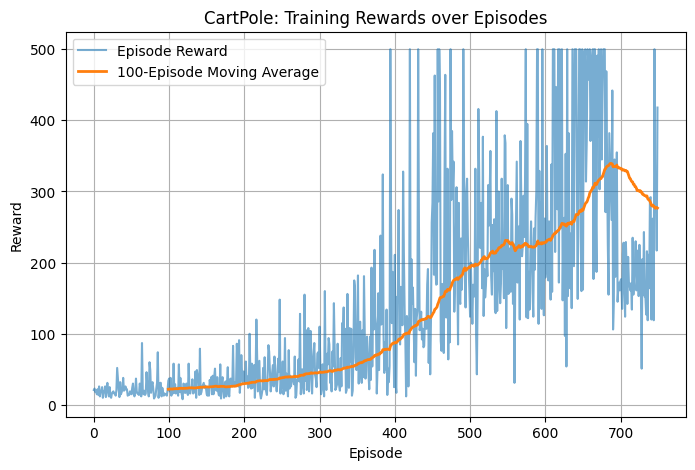

In [3]:
plot_training_rewards(game_name="CartPole", rewards=training_rewards)

In [4]:
rollout_rewards = rollout_policy(env, policy=trained_policy, device=device, episodes=500)

Episode    0 | Return: 281.0
Episode   50 | Return: 225.0
Episode  100 | Return: 334.0
Episode  150 | Return: 297.0
Episode  200 | Return: 274.0
Episode  250 | Return: 317.0
Episode  300 | Return: 283.0
Episode  350 | Return: 239.0
Episode  400 | Return: 423.0
Episode  450 | Return: 444.0


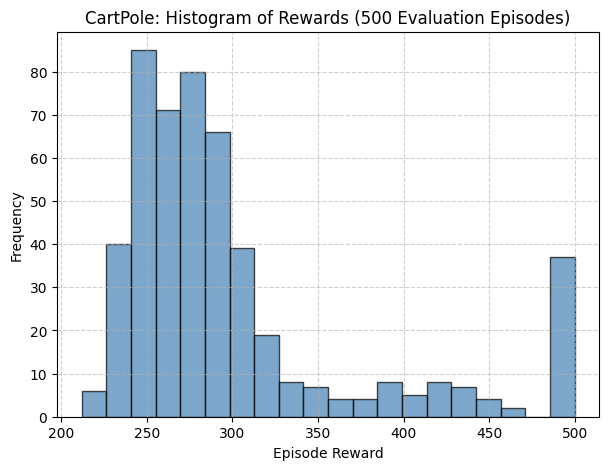

CartPole: Mean reward over 500 episodes: 300.95
CartPole: Std. dev. of reward: 72.94


In [5]:
plot_rollout_histogram(game_name="CartPole", rewards=rollout_rewards)

### Part 2: Adding moving-average baseline to the discounted reward

In [6]:
env = gym.make("CartPole-v1")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
obs_dim = env.observation_space.shape[0]
act_dim = env.action_space.n

trained_policy, training_rewards = train_policy(
    env=env,
    device=device,
    obs_dim=obs_dim,
    act_dim=act_dim,
    preprocess_obs=None,
    action_map=None,
    policy_lr=2e-3,
    gamma=0.95,
    training_episodes=750,
    hidden_dim=16,
    baseline=True,
    baseline_window=50
)

Episode    0 | Return: 8.0
Episode   50 | Return: 24.0
Episode  100 | Return: 12.0
Episode  150 | Return: 23.0
Episode  200 | Return: 35.0
Episode  250 | Return: 115.0
Episode  300 | Return: 181.0
Episode  350 | Return: 118.0
Episode  400 | Return: 234.0
Episode  450 | Return: 241.0
Episode  500 | Return: 291.0
Episode  550 | Return: 447.0
Episode  600 | Return: 191.0
Episode  650 | Return: 500.0
Episode  700 | Return: 500.0


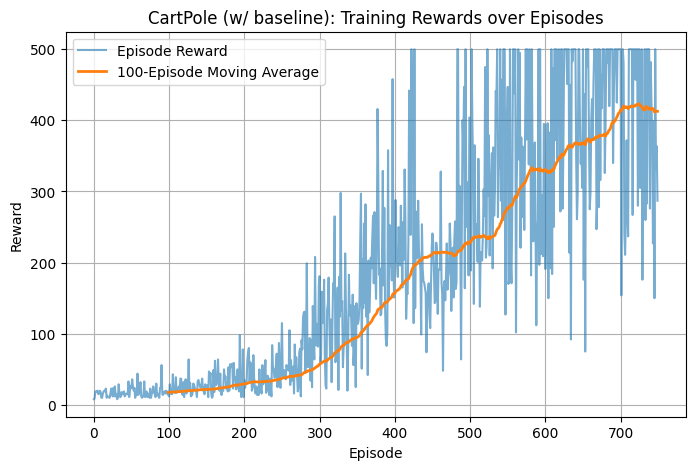

In [7]:
plot_training_rewards(game_name="CartPole (w/ baseline)", rewards=training_rewards)

Episode    0 | Return: 500.0
Episode   50 | Return: 500.0
Episode  100 | Return: 500.0
Episode  150 | Return: 500.0
Episode  200 | Return: 500.0
Episode  250 | Return: 331.0
Episode  300 | Return: 500.0
Episode  350 | Return: 500.0
Episode  400 | Return: 500.0
Episode  450 | Return: 500.0


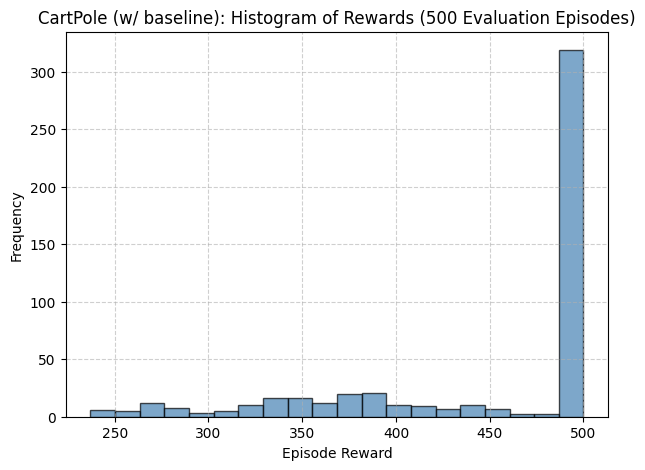

CartPole (w/ baseline): Mean reward over 500 episodes: 449.16
CartPole (w/ baseline): Std. dev. of reward: 75.76


In [10]:
rollout_rewards = rollout_policy(env, policy=trained_policy, device=device, episodes=500)
plot_rollout_histogram(game_name="CartPole (w/ baseline)", rewards=rollout_rewards)

### Effect of Adding the Moving Average Baseline

Adding a moving average baseline to the policy gradient algorithm appears to improve learning performance. From the training curves, both versions eventually reach similar final performance levels, but the version with the moving average baseline learns more quickly during the early stages.

Examining the reward histogram from the evaluation round, the baseline implementation demonstrates significantly better game performance. Although the standard deviation is similar between the two versions, the distribution shows that runs with the moving average baseline frequently reach the maximum reward, whereas the version without the baseline achieves rewards mostly in the 250–300 range.

Overall, incorporating a moving average baseline stabilizes learning and accelerates early-stage performance, resulting in a higher proportion of optimal outcomes across episodes.